In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import dill as pickle
import matplotlib.pyplot as plt

from scipy.stats import beta, norm

In [ ]:
data_dir = './/data'

COLOURS = ['#e97c4c', '#6a3009', '#0fc9aa', 
           '#d46011', '#b04f0e',
           '#076152', '#0b937d']

NETWORKS = ['dnf', 'hopfield', 'deepAttractor', 
            'accumulator', 'wta', 
            'shallowAttractor', 'shallowAttractorPlace',
            ]

LABELS = {'dnf': 'DNF',
          'hopfield': 'Hopfield', 
          'deepAttractor': 'Deep Attractor',
          'accumulator': 'Accumulator', 
          'wta': 'WTA', 
          'shallowAttractor': 'Shallow Attractor', 
          'shallowAttractorPlace': 'Shallow Attractor w/ A-P Cells', 
}

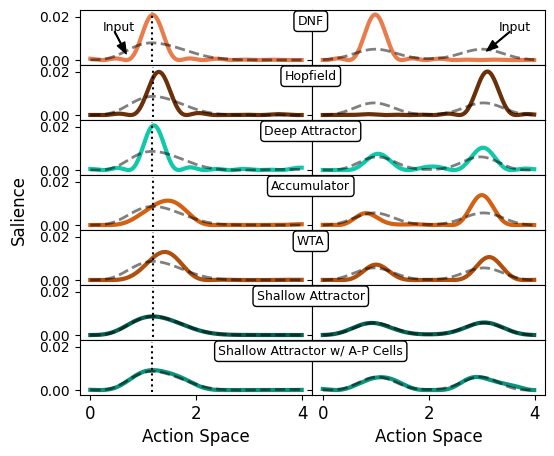

In [8]:
fig, axs = plt.subplots(7,2, figsize=(6,5), sharey=True)

for i, net in enumerate(NETWORKS):

    sims_before = pd.read_csv(os.path.join(data_dir, f'{net}_sims_before_beta.csv'))
    sims_after = pd.read_csv(os.path.join(data_dir, f'{net}_sims_after_beta.csv'))

    sal_max = np.arange(0,4,0.01)[np.argmax(sims_before['0'])]

    axs[i,0].plot(np.arange(0,4,0.01), sims_after['0'], color=COLOURS[i], linewidth=3)#, label=LABELS[net])
    axs[i,0].tick_params("y", labelsize="medium")
    axs[i,0].tick_params("x", labelsize="large")
    axs[i,0].vlines(sal_max, ymin=-0.001, ymax=0.022, ls=':', color='black')

    sims_before_bimod = pd.read_csv(os.path.join(data_dir, f'{net}_sims_before_bimod.csv'))
    sims_after_bimod = pd.read_csv(os.path.join(data_dir, f'{net}_sims_after_bimod.csv'))

    axs[i,1].plot(np.arange(0,4,0.01), sims_after_bimod['0'], color=COLOURS[i], linewidth=3)
    axs[i,1].tick_params("y", labelsize="medium")
    axs[i,1].tick_params("x", labelsize="large")

    axs[i,0].plot(np.arange(0,4,0.01), sims_before['0'], color='black', alpha=0.5, 
                      ls='--', linewidth=2)
        
    axs[i,1].plot(np.arange(0,4,0.01), sims_before_bimod['0'], color='black', alpha=0.5, 
                ls='--', linewidth=2)
    
    if i == 0:
        textstr = f"Input"
        axs[i,0].text(0.1, 0.8, textstr, transform=axs[i,0].transAxes, fontsize=9,
                verticalalignment='top')
        axs[i,0].annotate('', xy=(0.2, 0.2), xycoords='axes fraction', xytext=(0.15, 0.6), 
                    arrowprops=dict(color='black', width=0.5, headwidth=6, headlength=8))
        
        axs[i,1].text(1.8, 0.8, textstr, transform=axs[i,0].transAxes, fontsize=9,
                verticalalignment='top')
        axs[i,1].annotate('', xy=(0.75, 0.25), xycoords='axes fraction', xytext=(0.85, 0.6), 
                    arrowprops=dict(color='black', width=0.5, headwidth=6, headlength=8))
    
axs[3,0].text(-0.3, 1.0, 'Salience', transform=axs[3,0].transAxes, fontsize='large',
        verticalalignment='top', rotation=90)
axs[6,0].set_xlabel('Action Space', fontsize='large')
axs[6,1].set_xlabel('Action Space', fontsize='large')
plt.subplots_adjust(hspace=0, wspace=0)

y_s = [0.87,0.76,0.65,0.54,0.43,0.32,0.21]
for i in range(7):
     fig.text(0.51, y_s[i], LABELS[NETWORKS[i]], 
         ha='center', va='top', fontsize=9,
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black'))


plt.savefig('figs/test_dists_stacked.pdf', bbox_inches='tight')